# Module 1.2: Introduction to Multilayer Perceptrons (MLP)

## Objectives
- Understand the limitations of a single-layer perceptron and why we need multilayer networks.
- Learn the basic structure and function of a multilayer perceptron (MLP).
- Implement a simple MLP from scratch using NumPy.
- Visualize how an MLP can solve problems that a single-layer perceptron cannot.

## What is a Multilayer Perceptron?
A multilayer perceptron (MLP) is a type of feedforward artificial neural network that consists of at least three layers: an input layer, one or more hidden layers, and an output layer. Each layer is made up of neurons, and each neuron in one layer is connected to every neuron in the next layer.

The key difference between an MLP and a single-layer perceptron is the presence of one or more hidden layers, which allow the network to learn more complex, non-linear functions.

**MLP Structure:**
- Input layer: Receives the input features.
- Hidden layer(s): Each neuron applies a weighted sum and a non-linear activation function (e.g., sigmoid, ReLU).
- Output layer: Produces the final prediction.

Mathematically, for a single hidden layer:
$$
\begin{align*}
h &= \sigma(W^{(1)} x + b^{(1)}) \\
y &= \sigma(W^{(2)} h + b^{(2)})
\end{align*}
$$
where:
- $x$ is the input vector
- $W^{(1)}$, $b^{(1)}$ are the weights and biases for the hidden layer
- $h$ is the hidden layer output
- $W^{(2)}$, $b^{(2)}$ are the weights and biases for the output layer
- $\sigma$ is an activation function (e.g., sigmoid, ReLU)

## Why Do We Need Hidden Layers?
A single-layer perceptron can only solve linearly separable problems. However, many real-world problems are not linearly separable (e.g., XOR). By adding hidden layers and non-linear activation functions, an MLP can learn complex, non-linear decision boundaries.

**Example:** The XOR problem cannot be solved by a single-layer perceptron, but can be solved by an MLP with one hidden layer.

Let's visualize a simple MLP architecture:

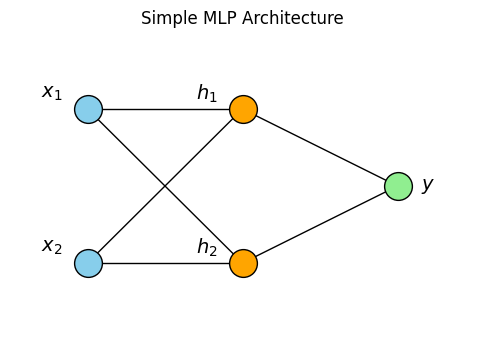

In [8]:
import matplotlib.pyplot as plt

def plot_simple_mlp():
    fig, ax = plt.subplots(figsize=(6,4))
    # Input layer
    for i, y in enumerate([1, -1]):
        ax.scatter(0, y, s=400, color='skyblue', edgecolor='k', zorder=10)
        ax.text(-0.6, y + 0.2, f'$x_{i+1}$', fontsize=14, va='center')
    # Hidden layer
    for i, y in enumerate([1, -1]):
        ax.scatter(2, y, s=400, color='orange', edgecolor='k', zorder=10)
        ax.text(1.4, y + 0.2, f'$h_{i+1}$', fontsize=14, va='center', color='k')
    # Output layer
    ax.scatter(4, 0, s=400, color='lightgreen', edgecolor='k', zorder=10)
    ax.text(4.3, 0, '$y$', fontsize=14, va='center')
    # Connections
    for y0 in [1, -1]:
        for y1 in [1, -1]:
            ax.plot([0,2],[y0,y1],'k-', lw=1)
    for y1 in [1, -1]:
        ax.plot([2,4],[y1,0],'k-', lw=1)
    ax.axis('off')
    ax.set_xlim(-1,5)
    ax.set_ylim(-2,2)
    plt.title('Simple MLP Architecture')
    plt.show()

plot_simple_mlp()

## The Forward Pass and Activation Functions
In an MLP, each neuron computes a weighted sum of its inputs, adds a bias, and applies a non-linear activation function. Common activation functions include sigmoid, tanh, and ReLU.

The forward pass for a single hidden layer MLP is:
$$
\begin{align*}
h &= \sigma(W^{(1)} x + b^{(1)}) \\
y &= \sigma(W^{(2)} h + b^{(2)})
\end{align*}
$$

Let's implement a simple MLP in NumPy to solve the XOR problem:

In [12]:
import numpy as np

# Activation function (sigmoid)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# XOR dataset
X_xor = np.array([[0,0],[0,1],[1,0],[1,1]])
y_xor = np.array([0,1,1,0])

# Manually set weights for a 2-2-1 MLP that solves XOR
W1 = np.array([[20,20], [-20,-20]])  # shape (2,2)
b1 = np.array([-10,30])              # shape (2,)
W2 = np.array([[20], [20]])          # shape (2,1)
b2 = np.array([-30])                 # shape (1,)

def mlp_xor_forward(X):
    h = sigmoid(X @ W1.T + b1)
    y = sigmoid(h @ W2 + b2)
    return y.squeeze()

# Predict and show results
y_pred = mlp_xor_forward(X_xor)
print('Input\tPredicted')
for x, yp in zip(X_xor, y_pred):
    print(f'{x}\t{yp:.3f}')

Input	Predicted
[0 0]	0.000
[0 1]	1.000
[1 0]	1.000
[1 1]	0.000


**Results:**
The MLP with one hidden layer and sigmoid activation can solve the XOR problem, which is not possible with a single-layer perceptron. The predicted outputs are close to 0 or 1 for each input, showing that the network has learned the non-linear mapping.

**Key Point:**
- The hidden layer and non-linear activation function allow the MLP to learn complex, non-linear relationships in the data.
- This is why MLPs are much more powerful than single-layer perceptrons.

## Summary and Next Steps
- You learned the motivation for multilayer perceptrons (MLPs) and how they overcome the limitations of single-layer perceptrons.
- You saw the structure of an MLP and how the forward pass works with non-linear activation functions.
- You implemented a simple MLP in NumPy to solve the XOR problem, demonstrating the power of hidden layers.

**Next steps:**
- Learn how to train an MLP using backpropagation and gradient descent.
- Explore different activation functions and architectures.
- Apply MLPs to real-world datasets and more complex problems.